# Exploração de Dados

Vamos explorar dados de crédito presentes neste neste link. Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente(default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

Vamos começar lendos os dados num dataframe pandas.


In [ ]:
import pandas as pd

In [ ]:
%cd drive/MyDrive/Ciencia_de_Dados-EBAC

/content/drive/MyDrive/Ciencia_de_Dados-EBAC


In [ ]:
df = pd.read_csv('Python_M10_support material.csv')

In [ ]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24
6,810347208,0,51,M,4,na,casado,$120K +,gold,46,6,3,1,34516.72,1330.87,31
7,818906208,0,32,M,0,ensino medio,na,$60K - $80K,silver,27,2,2,2,29081.49,1538.32,36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,22352.50,1350.14,24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,11656.41,1441.73,32


com os dados em maos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados

# Estrutura

In [ ]:
# retorna uma tupla (qtd linhas, qtd colunas)
df.shape

(10127, 16)

In [ ]:
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


# schema

In [ ]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


coluna e seus respectivos tipos de dados

In [ ]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


atributos categoricos

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


atributos numericos

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


# dados faltantes



1. dados faltantes pode ser

2. vazio(" ");
3. nulos(none);
4. nao disponivel ou aplicaveis (na, NA, etc...);
5. nao numerico(nan, NaN, etc...).



In [ ]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


podemos verificar quais colunas possuem dados faltantes

In [ ]:
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,False
estado_civil,False
salario_anual,False
tipo_cartao,False
meses_de_relacionamento,False


In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
stats_dados_faltantes(df=df)

In [ ]:
stats_dados_faltantes(df=df[df['default'] == 0])

In [ ]:
stats_dados_faltantes(df=df[df['default'] == 1])

# transformacao e limpeza de dados

agora que conhecemos melhor a natureza de nosso conjunto de dados, vamos conduzir uma atividade conhecida
como data wrangling que consiste na transformacao e limpeza de dados do conjunto para que possom
se melhor analisados. em especial vamos remover

1. corrigir o schema de nosso colunas
2. remover os dados faltantes

# correcao de schema

na etapa de exploracao, notamos que as colunas **`limite_credito`** e   **`valor_transacoes_12m`** estavam sendo interpretadas como colunas categoricas(dtype = object)

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

,0
limite_credito,object
valor_transacoes_12m,object


In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função lambda de limpeza pronta, basta aplica-la nas colunas de interesse.


In [ ]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [ ]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


atributos `categoricos`

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


atributos `numericos`

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


# remocao de dados faltantes


como o pandas esta ciente do que e um faltante, a remocao das linhas problematicas e trivial

In [ ]:
df.dropna(inplace=True)

vamos analisar a estrutura dos dados novamento

In [ ]:
df.shape

(10127, 16)

In [ ]:
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [ ]:
print(f"a proporcao adimplentes ativos e de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"a novo proporcao de clientes adimplentes e de {round(100 * qtd_adimplentes_novo / qtd_total, 2)}%")

a proporcao adimplentes ativos e de 83.93%
a novo proporcao de clientes adimplentes e de 83.93%


In [ ]:
print(f"a proporcao inadimplentes e de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"a nova proporcao de clientes inadimplentes e de {round(100 * qtd_inadimplentes_novo / qtd_total)}%")

a proporcao inadimplentes e de 16.07%
a nova proporcao de clientes inadimplentes e de 16%


# Visualizacao de Dados

os dados estao prontos, vamos criar diversas visualizacoes para correlacinar variaveis explicativas com a variavel
resposta para busca entender qual fator leva um cliente a inadimplencia.e para isso vamos sempre comparar a base com
todos os clientes com base de adimplentes e inadimplentes

comecamos entao importando os pacotes de visualizacao e separandoo os clientes adimplentes e inadimplentes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [ ]:
df_adimplente = df[df['default'] == 0]

In [ ]:
df_inadimplente = df[df['default'] == 1]

# Visualizacoes Categoricas

neste secao vamos visualizar a relacao entre a variavel resposta `default` com os atributos categoricos

In [ ]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
3,F,ensino medio,na,menos que $40K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue


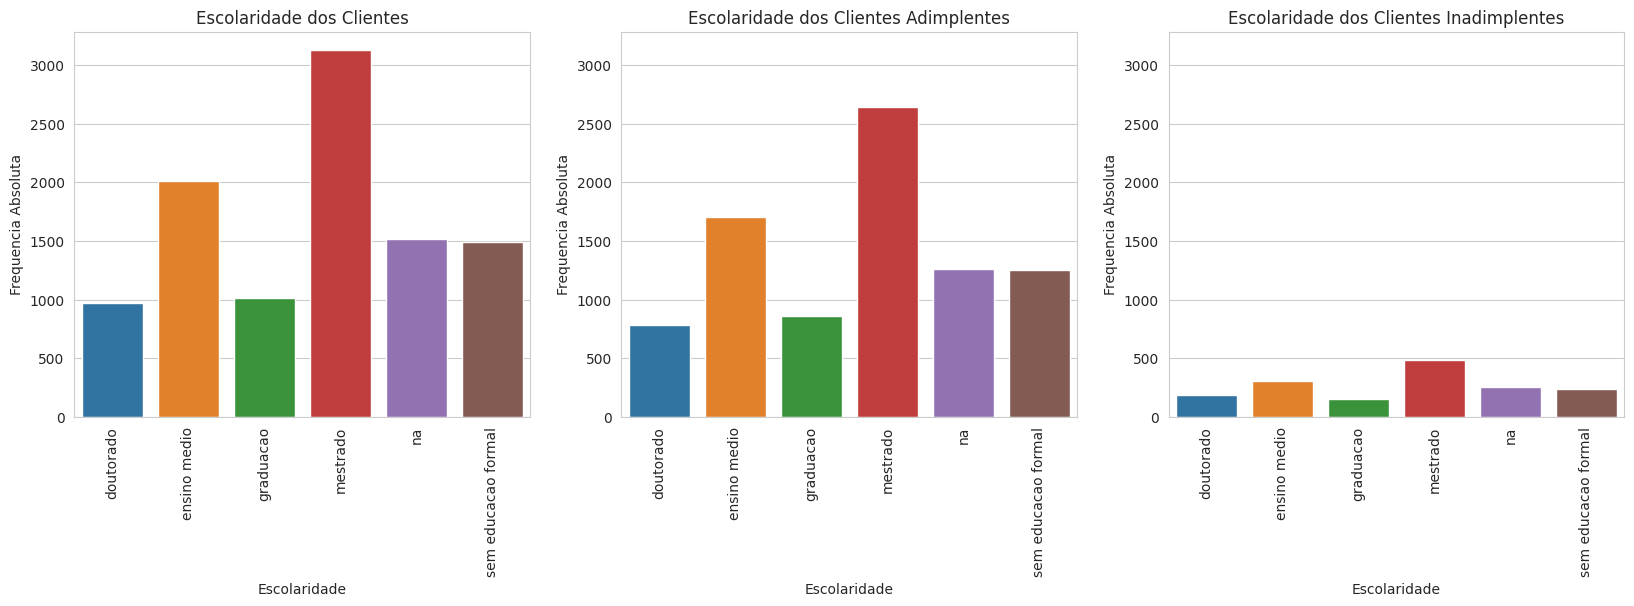

In [ ]:
coluna = "escolaridade"
titulos = [
    "Escolaridade dos Clientes",
    "Escolaridade dos Clientes Adimplentes",
    "Escolaridade dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo], hue=coluna, legend=False)
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequencia Absoluta")
    f.tick_params(axis='x', rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

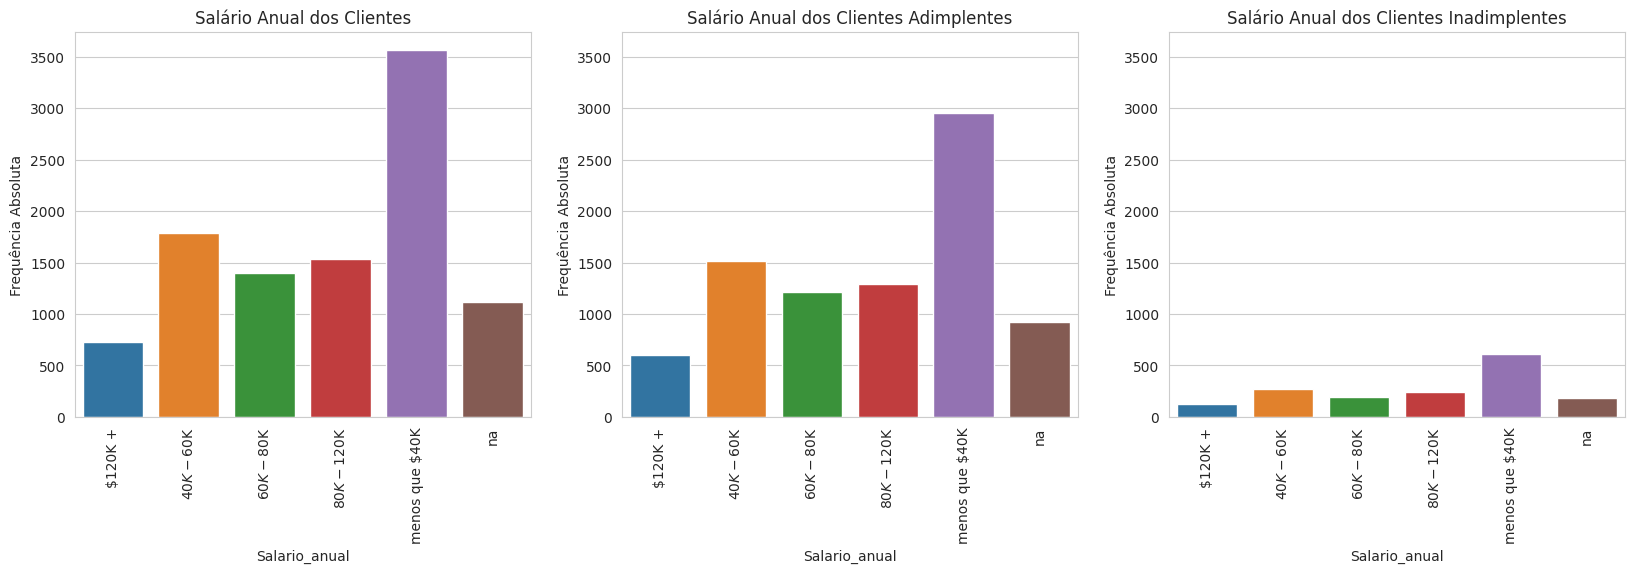

In [ ]:
coluna = "salario_anual"
titulos = [
    "Salário Anual dos Clientes",
    "Salário Anual dos Clientes Adimplentes",
    "Salário Anual dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo], hue=coluna, legend=False)
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.tick_params(axis='x', rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()


# Visualizações numéricas

Nesta seção, vamos visualizar a relação entre a variável resposta default com os atributos numéricos.

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
3,40,4,34,3,1,4,3313.03,1171.56,20
4,40,3,21,5,0,1,4716.22,816.08,28


Quantidade de Transações nos Últimos 12 Meses



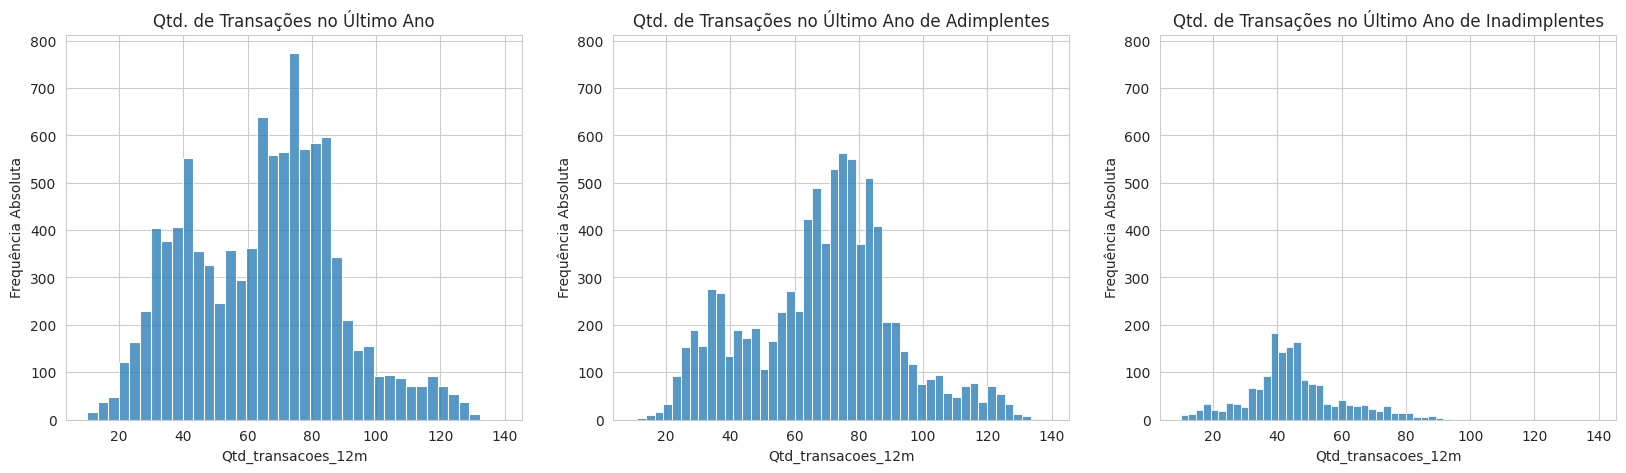

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Valor das Transações nos Últimos 12 Meses



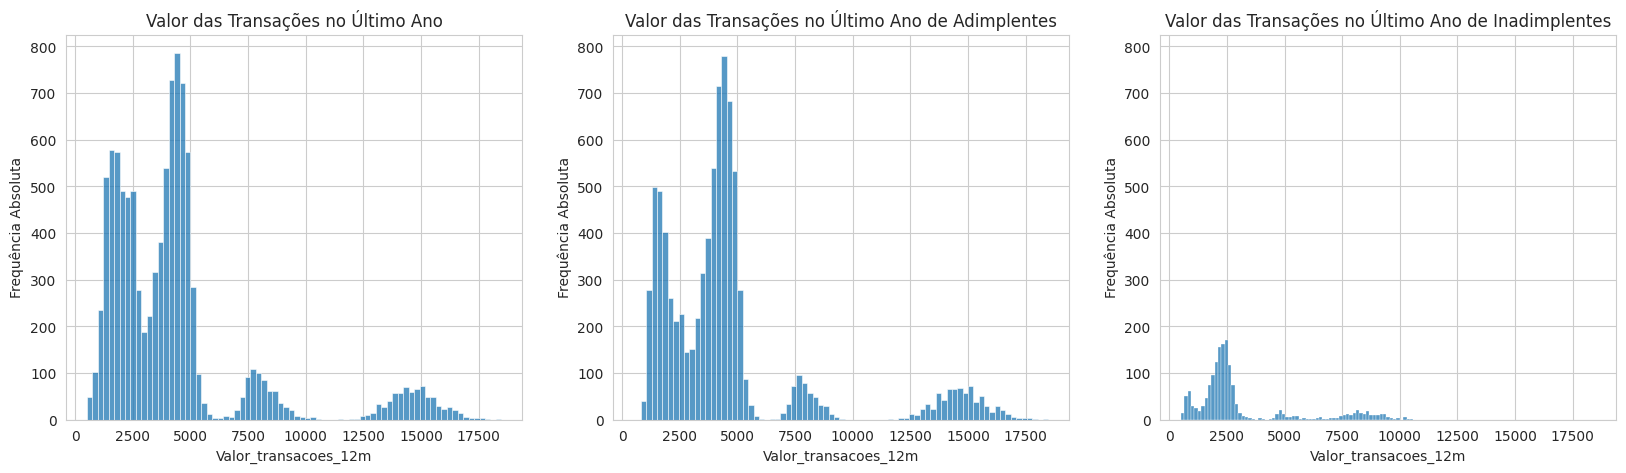

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses



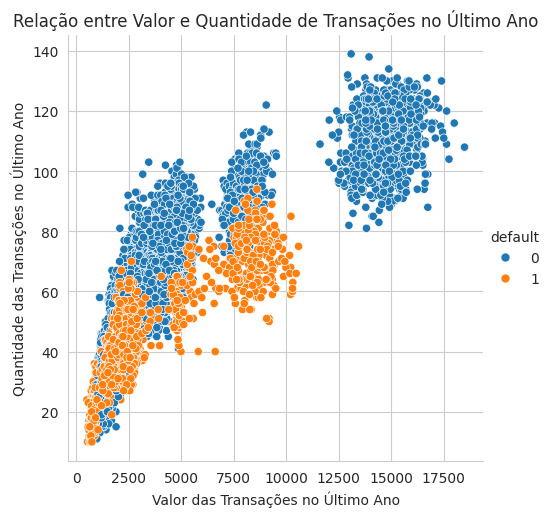

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )